In [1]:
!pip install torch==2.3.0 torchtext==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.21.5
    Uninstalling nvidia-nccl-cu12-2.21.5:
      Successfully uninstalled nvidia-nccl-cu12-2.21.5
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 9.1.0.70
    Uninstalling nvidia-cudnn-cu12-9.1.0.70:
      Successfully uninstalled nvidia-cudnn-cu12-9.1.0.70
  Attempting uninstall: torch
    Found existing in

In [2]:

!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 2.3.0 which is incompatible.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.3.0 which is incompatible.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 202

In [3]:
import collections
import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

In [4]:
train_data,test_data=datasets.load_dataset("imdb",split=["train","test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [5]:
train_data,test_data

(Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }))

In [6]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [7]:

train_data[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

# Tokenization



In [8]:
from torchtext.data import get_tokenizer


/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [9]:
tokenizer = get_tokenizer("basic_english")

In [10]:
tokenizer("Hello world ! How are you doing today? i am doing fantastic!")

['hello',
 'world',
 '!',
 'how',
 'are',
 'you',
 'doing',
 'today',
 '?',
 'i',
 'am',
 'doing',
 'fantastic',
 '!']

In [11]:
def tokenize_example(example,tokenizer,max_length):
  tokens=tokenizer(example["text"])[:max_length]
  return {"tokens":tokens}

In [12]:
max_length=256
train_data=train_data.map(tokenize_example,fn_kwargs={"tokenizer":tokenizer,"max_length":max_length})
test_data=test_data.map(tokenize_example,fn_kwargs={"tokenizer":tokenizer,"max_length":max_length})

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

# validation Data

In [13]:
test_size = 0.25
train_valid_data = train_data.train_test_split(test_size = test_size)
train_data = train_valid_data["train"]
valid_data = train_valid_data["test"]

In [14]:
len(train_data) , len(valid_data) , len(test_data)

(18750, 6250, 25000)

# Vocabulary

In [15]:
from torchtext.vocab import build_vocab_from_iterator

/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [16]:
min_freq = 5
special_tokens = ['<unk>', '<pad>']
vocab = build_vocab_from_iterator(
    train_data['tokens'],
    min_freq=min_freq,
    specials=special_tokens
)
len(vocab)

21523

In [17]:
vocab.get_itos()[:10]

['<unk>', '<pad>', 'the', '.', ',', 'a', 'and', 'of', 'to', "'"]

In [18]:
vocab['and']

6

In [19]:
unk_index = vocab['<unk>']
pad_index = vocab['<pad>']

In [20]:
unk_index

0

In [21]:
pad_index

1

In [22]:
vocab.set_default_index(unk_index)

In [23]:
vocab['asdon']

0

# Converting Data into Numbers

In [24]:
def numericalize_example(example , vocab):
  ids = vocab.lookup_indices(example["tokens"])
  return {"ids":ids}

In [25]:
train_data = train_data.map(numericalize_example,fn_kwargs={"vocab":vocab})
valid_data = valid_data.map(numericalize_example,fn_kwargs={"vocab":vocab})
test_data = test_data.map(numericalize_example,fn_kwargs={"vocab":vocab})

Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

# Data into Tensor

In [26]:
train_data = train_data.with_format(type = "torch" , columns = ['ids' , 'label'])
valid_data = valid_data.with_format(type = "torch" , columns = ['ids' , 'label'])
test_data = test_data.with_format(type = "torch" , columns = ['ids' , 'label'])

# Creating DataLoaders

In [62]:
def get_collate_fn(pad_index):
  def collate_fn(batch):
    batch_ids = [i['ids'] for i in batch]
    batch_ids = nn.utils.rnn.pad_sequence(
        batch_ids , padding_value = pad_index , batch_first = True
    )

    batch_label = [i["label"] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {"ids": batch_ids , "label": batch_label}
    return batch
  return collate_fn



In [63]:
def get_data_loader(dataset , batch_size , pad_index , shuffle = False):
  collate_fn = get_collate_fn(pad_index)
  data_loader = torch.utils.data.DataLoader(
      dataset = dataset ,
      batch_size = batch_size ,
      shuffle = shuffle ,
      collate_fn = collate_fn
  )
  return data_loader

In [64]:
batch_size = 512
train_data_loader = get_data_loader(train_data , batch_size , pad_index , shuffle = True)
valid_data_loader = get_data_loader(valid_data , batch_size , pad_index)
test_data_loader = get_data_loader(test_data , batch_size , pad_index)

In [65]:
len(train_data_loader) , len(valid_data_loader) , len(test_data_loader)

(37, 13, 49)

# **Build Model**

In [66]:
class NBow(nn.Module):

  def __init__(self , vocab_size , embedding_dim , output_dim , pad_index):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size , embedding_dim , padding_idx = pad_index)
    self.fc = nn.Linear(embedding_dim , output_dim)

  def forward(self , x):
    # ids = [batch_size , seq_length]
    embedded = self.embedding(x)
    # embedded = [batch_size , seq_len , embedding_dim]
    pooled = embedded.mean(dim = 1)
    # pooled = [batch_size , embedding_dim]
    prediction = self.fc(pooled)
    # prediction = [batch_size , output_dim]
    return prediction


In [67]:
vocab_size = len(vocab)
embedding_dim = 300
output_dim = len(train_data.unique("label"))
model = NBow(vocab_size , embedding_dim , output_dim , pad_index)

In [68]:
model

NBow(
  (embedding): Embedding(21523, 300, padding_idx=1)
  (fc): Linear(in_features=300, out_features=2, bias=True)
)

In [69]:
def count_parameter(model):
  return  sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"The model has {count_parameter(model):,} trainable parameters")

The model has 6,457,502 trainable parameters


In [35]:
vectors = torchtext.vocab.GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [06:51, 5.29MB/s]                            
100%|█████████▉| 2196016/2196017 [06:07<00:00, 5967.80it/s]


In [70]:
vect = vectors.get_vecs_by_tokens("india")
vect.shape

torch.Size([300])

In [71]:
len(vocab)

21523

In [72]:
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())

In [73]:
pretrained_embedding.shape

torch.Size([21523, 300])

In [74]:
model.embedding.weight

Parameter containing:
tensor([[ 0.3215,  1.9046,  1.8677,  ..., -0.2965, -0.4212, -0.1320],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.4607, -0.0666, -1.0135,  ..., -0.0199, -1.9743, -0.8931],
        ...,
        [ 1.2444, -0.3216,  0.2366,  ...,  1.9128, -1.6122, -1.3896],
        [ 1.5232, -1.0733,  1.0958,  ...,  0.5359,  1.1851,  1.0256],
        [-0.2079, -1.8574,  0.4137,  ...,  1.0878, -0.0680, -0.0066]],
       requires_grad=True)

In [75]:
pretrained_embedding

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.1187, -0.5503, -0.4848,  ...,  0.2006,  0.0301,  0.3918],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [76]:
model.embedding.weight.data = pretrained_embedding

In [77]:
model.embedding.weight

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.1187, -0.5503, -0.4848,  ...,  0.2006,  0.0301,  0.3918],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       requires_grad=True)

# **Loss Function and Optimizer**

In [78]:
optimizer = optim.Adam(model.parameters())

In [79]:
criterion = nn.CrossEntropyLoss()

In [80]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [81]:
device

device(type='cpu')

In [82]:
model = model.to(device)

In [83]:
criterion = criterion.to(device)

# **Training and Evaluation Loop**

In [84]:
def train(data_loader , model , crtiterion , optimizer , device):
  model.train()
  epoch_losses = []
  epoch_accs = []
  for batch in tqdm.tqdm(data_loader , desc = "training..."):
    ids = batch["ids"].to(device)
    label = batch["label"].to(device)
    prediction = model(ids)
    loss = criterion(prediction , label)
    acc = get_accuracy(prediction , label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_losses.append(loss.item())
    epoch_accs.append(acc.item())
  return np.mean(epoch_losses) , np.mean(epoch_accs)


In [85]:
def evaluate(data_loader , model , criterion , deivice):
  model.eval()
  epoch_losses = []
  epoch_accs = []
  with torch.no_grad():
    for batch in tqdm.tqdm(data_loader , desc = 'evaluating...'):
      ids = batch["ids"].to(device)
      label = batch["label"].to(device)
      prediction = model(ids)
      loss = criterion(prediction , label)
      accuracy = get_accuracy(prediction , label)
      epoch_losses.append(loss.item())
      epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses) , np.mean(epoch_accs)


In [86]:
def get_accuracy(prediction , label):
  batch_size , _ = prediction.shape
  predicted_classes = prediction.argmax(dim = -1)
  correct_prediction = predicted_classes.eq(label).sum()
  accuracy = correct_prediction / batch_size
  return accuracy


# **Training Loop**

In [87]:
n_epochs = 10
best_valid_loss = float("inf")
metrics = collections.defaultdict(list)
for epoch in range(n_epochs):
  train_loss , train_acc = train(train_data_loader , model , criterion , optimizer , device)
  valid_loss , valid_acc = evaluate(train_data_loader , model , criterion , device)
  metrics["train_loss"].append(train_loss)
  metrics["train_acc"].append(train_acc)
  metrics["valid_loss"].append(valid_loss)
  metrics["valid_acc"].append(valid_acc)
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict() , "nbow.pt")
  print(f"epoch: {epoch + 1} train loss: {valid_loss}")


evaluating...: 100%|██████████| 37/37 [00:06<00:00,  5.42it/s]


epoch: 1 train loss: 0.6570918431153169


evaluating...: 100%|██████████| 37/37 [00:05<00:00,  6.24it/s]


epoch: 2 train loss: 0.6024722473041432


evaluating...: 100%|██████████| 37/37 [00:13<00:00,  2.83it/s]


epoch: 3 train loss: 0.5306194730707117


evaluating...: 100%|██████████| 37/37 [00:07<00:00,  5.20it/s]


epoch: 4 train loss: 0.45941774990107564


evaluating...: 100%|██████████| 37/37 [00:06<00:00,  5.78it/s]


epoch: 5 train loss: 0.39879035224785675


evaluating...: 100%|██████████| 37/37 [00:06<00:00,  5.92it/s]


epoch: 6 train loss: 0.3521874047614433


evaluating...: 100%|██████████| 37/37 [00:07<00:00,  5.14it/s]


epoch: 7 train loss: 0.31620355151795054


evaluating...: 100%|██████████| 37/37 [00:06<00:00,  5.42it/s]


epoch: 8 train loss: 0.28682464441737615


evaluating...: 100%|██████████| 37/37 [00:13<00:00,  2.84it/s]


epoch: 9 train loss: 0.26253160955132665


evaluating...: 100%|██████████| 37/37 [00:08<00:00,  4.61it/s]

epoch: 10 train loss: 0.24223733753771395


# **Visualization**

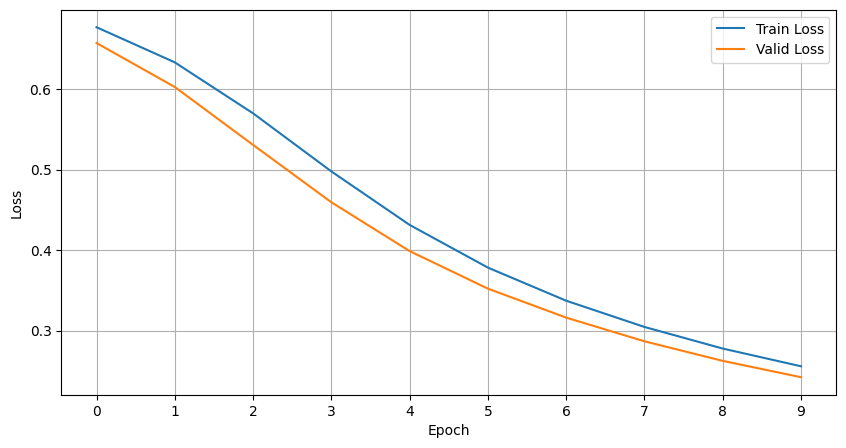

In [94]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

# Plot train and validation losses
ax.plot(metrics["train_loss"], label="Train Loss")
ax.plot(metrics["valid_loss"], label="Valid Loss")

# Set labels and ticks
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(range(n_epochs))

# Add legend and grid
ax.legend()  # Corrected line
ax.grid()

# Show the plot
plt.show()

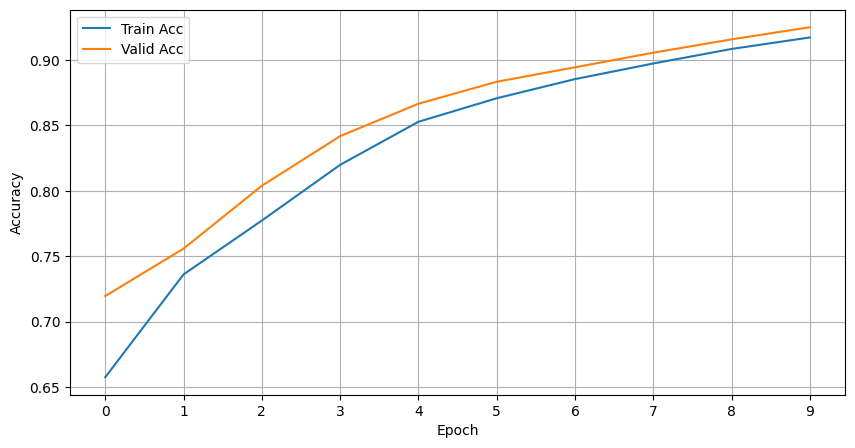

In [95]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(metrics["train_acc"], label="Train Acc")
ax.plot(metrics["valid_acc"], label="Valid Acc")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()
plt.show()

In [97]:
model.load_state_dict(torch.load("nbow.pt"))
test_loss , test_acc = evaluate(test_data_loader , model , criterion , device)
print(f"test loss: {test_loss} test acc: {test_acc}")

evaluating...: 100%|██████████| 49/49 [00:10<00:00,  4.50it/s]

test loss: 0.3507433533668518 test acc: 0.856029042175838


# Senti Analysis

In [100]:

def predict_sentiment(text,model,tokenizer,vocab,device):
  tokens=tokenizer(text)
  ids=vocab.lookup_indices(tokens)
  tensor=torch.LongTensor(ids).unsqueeze(dim=0).to(device)
  prediction=model(tensor).squeeze(dim=0)
  probability=torch.softmax(prediction,dim=-1)
  predicted_class=prediction.argmax(dim=-1).item()
  predicted_probability=probability[predicted_class].item()
  return predicted_class,predicted_probability

In [101]:
text = "this film is terrible!"
predict_sentiment(text , model , tokenizer , vocab , device)

(0, 0.9999983310699463)

In [102]:

text="this film is great"
predict_sentiment(text,model,tokenizer,vocab,device)

(1, 0.9999998807907104)

In [103]:
text="this film is not terrible,it's great!"
predict_sentiment(text,model,tokenizer,vocab,device)

(1, 0.5577136874198914)